In [1]:
%matplotlib inline

# MNIST with MLP
## A quick dive into neural networks!
Mohammad Taher Pilehvar,
Iran University of Science and Technology 
(Modified from Xavier Snelgrove, U of Torronto)


## Open a new notebook

    ipython notebook
    
Create a new Python notebook from the "New" menu at the top-right. You should now be able to run Python in your browser!


First let's import some prerequisites:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,9) # Make the figures a bit bigger

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils, to_categorical

Using TensorFlow backend.


## Load training data

In [3]:
nb_classes = 10

# the data, shuffled and split between tran and test sets
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


Let's look at some examples of the training data

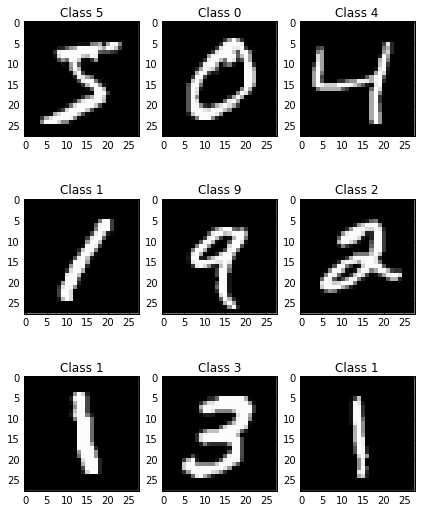

In [5]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(train_images[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(train_labels[i]))

## Format the data for training
Our neural-network is going to take a single vector for each training example, so we need to reshape the input so that each 28x28 image becomes a single 784 dimensional vector. We'll also scale the inputs to be in the range [0-1] rather than [0-255]

In [6]:
x_train = train_images.reshape((60000, 28 * 28))
x_train = x_train.astype('float32') / 255
x_test = test_images.reshape((10000, 28 * 28))
x_test = x_test.astype('float32') / 255

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


Modify the target matrices to be in the one-hot format, i.e.

```
0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0]
1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]
2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0]
etc.
```

In [7]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)
print(len(y_train))
print(y_train[2])

60000
[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]


## Build the neural network
Build the neural-network. Here we'll do a simple 2 layer fully connected network.

In [21]:
network = Sequential()
network.add(Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(Dense(10, activation='softmax'))

## Compile the model

When compiing a model, Keras asks you to specify your **loss function** and your **optimizer**. The loss function we'll use here is called *categorical crossentropy*, and is a loss function well-suited to comparing two probability distributions.

Here our predictions are probability distributions across the ten different digits (e.g. "we're 80% confident this image is a 3, 10% sure it's an 8, 5% it's a 2, etc."), and the target is a probability distribution with 100% for the correct category, and 0 for everything else. The cross-entropy is a measure of how different your predicted distribution is from the target distribution. [More detail at Wikipedia](https://en.wikipedia.org/wiki/Cross_entropy)

The optimizer helps determine how quickly the model learns, how resistent it is to getting "stuck" or "blowing up". We won't discuss this in too much detail, but "adam" is often a good choice (developed at U of Torronto).

In [22]:
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


## Train the model!
This is the fun part: you can feed the training data loaded in earlier into this model and it will learn to classify digits

In [32]:
network.fit(x_train, y_train, epochs=5, batch_size=15000)

Epoch 1/5
60000/60000 [==============================] - 2s - loss: 9.1639e-04 - acc: 1.0000     
Epoch 2/5
60000/60000 [==============================] - 2s - loss: 8.7127e-04 - acc: 1.0000     
Epoch 3/5
60000/60000 [==============================] - 2s - loss: 8.5600e-04 - acc: 1.0000     
Epoch 4/5
60000/60000 [==============================] - 2s - loss: 8.4569e-04 - acc: 1.0000 
Epoch 5/5
60000/60000 [==============================] - 2s - loss: 8.3272e-04 - acc: 1.0000     


## Finally, evaluate its performance

In [33]:
score = network.evaluate(x_test, y_test)

print('Test score:', score[0])
print('Test accuracy:', score[1])

 9952/10000 [============================>.] - ETA: 0s('Test score:', 0.072962130804896289)
('Test accuracy:', 0.98350000000000004)


### Inspecting the output

It's always a good idea to inspect the output and make sure everything looks sane. Here we'll look at some examples it gets right, and some examples it gets wrong.

In [25]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = network.predict_classes(x_test)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == test_labels)[0]
incorrect_indices = np.nonzero(predicted_classes != test_labels)[0]

 9856/10000 [============================>.] - ETA: 0s

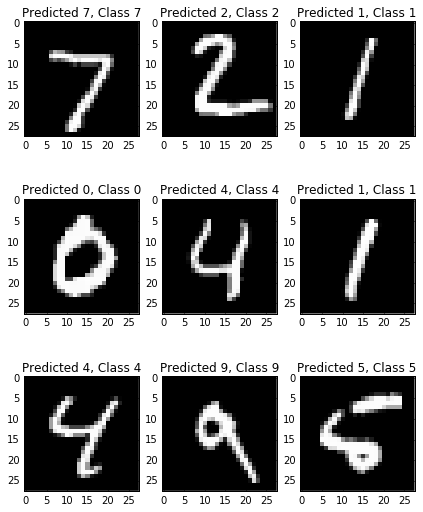

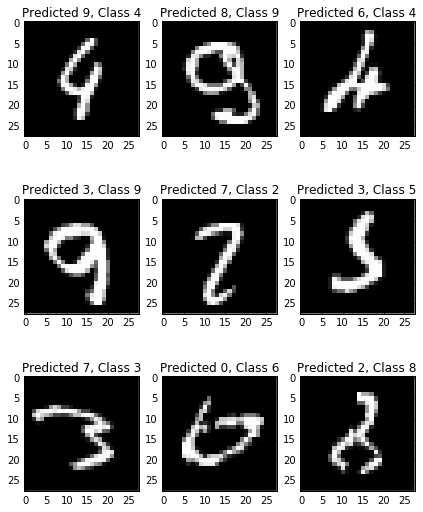

In [26]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_images[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_labels[correct]))
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_images[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_labels[incorrect]))

# That's all!

There are lots of other great examples at the Keras homepage at http://keras.io and in the source code at https://github.com/fchollet/keras